In [50]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import random


(128, 26)

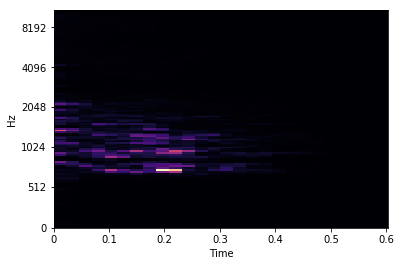

In [51]:
y1, sr1 = librosa.load('./Dataset/Clap/Clap67.wav')
ps1 = librosa.feature.melspectrogram(y=y1, sr=sr1)
librosa.display.specshow(ps1, y_axis='mel', x_axis='time')
ps1.shape


In [52]:
# Приведение всех сэмплов к одной длинне таким образом, чтобы размерность спектрограммы была 128х128
D = []
for i in range(1, 1219):
    y, sr = librosa.load('./Dataset/Snare/Snare' + str(i) + '.wav')
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    D.append( (ps, 1) )


In [53]:
Ys = []
for i in range(1, 1219):
    y1, sr1 = librosa.load('./Dataset/Kick/Kick' + str(i) + '.wav', duration = 2.97)
    Ys.append((y1,sr1))

In [54]:
for i in range(0, 1218):
  Ys[i] = [np.pad(Ys[i][0], (0, 65489 - Ys[i][0].shape[0]), 'constant'), Ys[i][1]]

In [55]:
D = []
for i in range(0, 1218):   
    ps = librosa.feature.melspectrogram(y=Ys[i][0], sr=Ys[i][1])
    D.append((ps,1))

In [56]:
Ys = []
for i in range(1, 1362):
    y1, sr1 = librosa.load('./Dataset/Snare/Snare' + str(i) + '.wav', duration = 2.97)
    Ys.append((y1,sr1))
    
for i in range(0, 1361):
  Ys[i] = [np.pad(Ys[i][0], (0, 65489 - Ys[i][0].shape[0]), 'constant'), Ys[i][1]]
    
for i in range(0, 1361):   
  ps = librosa.feature.melspectrogram(y=Ys[i][0], sr=Ys[i][1])
  D.append((ps,2))

In [57]:
Ys = []
for i in range(1, 583):
    y1, sr1 = librosa.load('./Dataset/Clap/Clap' + str(i) + '.wav', duration = 2.97)
    Ys.append((y1,sr1))
    
for i in range(0, 582):
  Ys[i] = [np.pad(Ys[i][0], (0, 65489 - Ys[i][0].shape[0]), 'constant'), Ys[i][1]]
    
for i in range(0, 582):   
  ps = librosa.feature.melspectrogram(y=Ys[i][0], sr=Ys[i][1])
  D.append((ps,3))

In [58]:
Ys = []
for i in range(1, 815):
    y1, sr1 = librosa.load('./Dataset/HH/HH' + str(i) + '.wav', duration = 2.97)
    Ys.append((y1,sr1))
    
for i in range(0, 814):
  Ys[i] = [np.pad(Ys[i][0], (0, 65489 - Ys[i][0].shape[0]), 'constant'), Ys[i][1]]
    
for i in range(0, 814):   
  ps = librosa.feature.melspectrogram(y=Ys[i][0], sr=Ys[i][1])
  D.append((ps,4))

In [59]:
# Перемешивание датасета
dataset = D
random.shuffle(dataset)

In [60]:
# Разделение тренировочной и контрольной выборки
train = dataset[:3700]
test = dataset[3700:]

X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

In [61]:
# Изменение размерности для входа СНН
X_train = np.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 128, 1) ) for x in X_test])

# Кастинг в категориальные признаки
y_train = np.array(keras.utils.to_categorical(y_train, 5))
y_test = np.array(keras.utils.to_categorical(y_test, 5))

In [62]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(5))
model.add(Activation('softmax'))

In [63]:
model.compile(
	optimizer="Adam",
	loss="categorical_crossentropy",
	metrics=['accuracy'])

model.fit(
	x=X_train, 
	y=y_train,
    epochs=12,
    batch_size=128,
    validation_data= (X_test, y_test))

score = model.evaluate(
	x=X_test,
	y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 3700 samples, validate on 275 samples
Epoch 1/12
3700/3700 [==============================] - 34s 9ms/step - loss: 0.9990 - acc: 0.6786 - val_loss: 0.5622 - val_acc: 0.8582
Epoch 2/12
3700/3700 [==============================] - 33s 9ms/step - loss: 0.6839 - acc: 0.7908 - val_loss: 0.4932 - val_acc: 0.8364
Epoch 3/12
3700/3700 [==============================] - 33s 9ms/step - loss: 0.5620 - acc: 0.8173 - val_loss: 0.4165 - val_acc: 0.8727
Epoch 4/12
3700/3700 [==============================] - 33s 9ms/step - loss: 0.5212 - acc: 0.8365 - val_loss: 0.4257 - val_acc: 0.8618
Epoch 5/12
3700/3700 [==============================] - 34s 9ms/step - loss: 0.4715 - acc: 0.8465 - val_loss: 0.3589 - val_acc: 0.8836
Epoch 6/12
3700/3700 [==============================] - 33s 9ms/step - loss: 0.4434 - acc: 0.8570 - val_loss: 0.3978 - val_acc: 0.8764
Epoch 7/12
3700/3700 [==============================] - 33s 9ms/step - loss: 0.4256 - acc: 0.8657 - val_loss: 0.3612 - val_acc: 0.9091
Epoch 8/